# Practical Machine Learning
by Sven Mayer

## 	Lecture 05: Full Practical Neural Network Walkthrough

The material is licensed under the Creative Commons Attribution-Share Alike 4.0 (CC BY-SA) license: https://creativecommons.org/licenses/by-sa/4.0

# Classification

The following clasificaion example determines if a touch inout is performed by a human finger or by the knuckle. Therefore, we will use a subste of the data published by Schweigert et al. [1]

<img src="http://sven-mayer.com/wp-content/uploads/2020/01/schweigert2019knuckletouch-300x169.jpg">

[1] Robin Schweigert, Jan Leusmann, Simon Hagenmayer, Maximilian Weiß, Huy Viet Le, Sven Mayer, and Andreas Bulling. 2019. KnuckleTouch: Enabling Knuckle Gestures on Capacitive Touchscreens using Deep Learning. In Proceedings of Mensch und Computer 2019 (MuC'19). Association for Computing Machinery, New York, NY, USA, 387–397. DOI: https://doi.org/10.1145/3340764.3340767 Video: https://www.youtube.com/watch?v=4U1daa7fCbY

Source Code: https://git.hcics.simtech.uni-stuttgart.de/public-projects/knuckletouch/

In [1]:
import sys
print("Python version: ", sys.version)
import numpy as np
print("numpy version", np.__version__)
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
print("matplotlib version", matplotlib.__version__)
import tensorflow as tf
print("TF:", tf.__version__)

Python version:  3.9.1 (default, Jan  8 2021, 17:17:17) 
[Clang 12.0.0 (clang-1200.0.32.28)]
numpy version 1.19.5
matplotlib version 3.3.3
INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2
TF: 2.5.0-rc0


### Downloading the subset 

In [2]:
SOURCE_FOLDER = "https://www.perceptualui.org/files/schweigert19_muc/"
TARGET_FOLDER = "./dataKnckleTouch/"

# Create target folder
from pathlib import Path
Path(TARGET_FOLDER).mkdir(parents=True, exist_ok=True)

# Download files and save to target folder
files = []
import urllib.request
for pId in [1, 2, 3]:
    sourceFileName = "%s%s%i%s" % (SOURCE_FOLDER, "DataStudyCollection/", pId, "_studyData.csv")
    targetFileName = "%s%i%s" % (TARGET_FOLDER, pId, "_studyData.csv")
    print("Downloading", sourceFileName)
    #urllib.request.urlretrieve(sourceFileName, targetFileName)
    files.append(targetFileName)

In [3]:
files

['./dataKnckleTouch/1_studyData.csv',
 './dataKnckleTouch/2_studyData.csv',
 './dataKnckleTouch/3_studyData.csv']

## Data Exploration
Now that we have data we need to ensure we understand how the data is formated and what it contains

In [4]:
import pandas as pd

#Reading first file and displaying is
df = pd.read_csv(files[0], sep=";")
df.head()

userID    Timestamp  Current_Task  Task_amount  TaskID  VersionID  \
0       1  1,54515E+12             0            0       0          0   
1       1  1,54515E+12             0           34       0          0   
2       1  1,54515E+12             0           34       0          0   
3       1  1,54515E+12             0           34       0          0   
4       1  1,54515E+12             0           34       0          0   

   RepetitionID  Actual_Data  Is_Pause  \
0             0        False     False   
1             0        False     False   
2             0        False     False   
3             0        False     False   
4             0        False     False   

                                               Image  
0  1545148799,883271245,2,2,2,0,1,2,1,2,0,0,0,2,2...  
1  1545148799,925229684,2,2,2,0,1,2,1,2,0,0,0,2,2...  
2  1545148799,963503069,2,2,2,0,1,2,1,2,0,0,0,2,2...  
3  1545148800,005909215,2,2,2,0,1,2,1,2,0,0,0,2,2...  
4  1545148800,048485256,2,2,2,0,1,2,1,2,0,0,0,2,2...

In [5]:
df.iloc[0].Image

'1545148799,883271245,2,2,2,0,1,2,1,2,0,0,0,2,2,0,0,2,2,1,1,1,2,0,1,0,2,1,-1,0,0,-1,-1,-2,-1,0,-1,0,0,-2,0,-2,-1,-2,-3,-3,-2,0,0,0,0,1,2,0,0,-2,0,0,-2,0,-2,0,2,1,0,2,2,1,1,2,2,0,4,-2,1,0,1,0,-96,2,0,1,0,1,0,2,0,1,-1,2,-1,1,-1,-1,0,0,-1,-1,-1,0,1,0,-1,-1,-1,0,-1,-2,1,-2,-1,0,0,-2,-2,-2,-1,-2,-1,-1,-4,-3,-3,-3,-5,-5,-3,-2,0,0,-1,0,0,-2,0,0,0,1,0,1,0,1,0,0,1,1,1,1,0,1,1,1,-1,0,0,0,0,-1,0,0,0,0,0,0,0,0,-1,0,0,0,-1,0,0,0,0,0,0,0,-1,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,-2,0,0,0,0,0,-2,0,0,-2,0,0,0,0,-3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,-2,0,-2,0,0,0,-3,0,0,0,0,0,0,0,0,0,0,0,0,-2,0,0,0,0,-2,0,0,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2,0,0,0,1,0,1,0,1,1,1,0,1,2,0,1,2,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,2,0,0,0,1,0,0,1,1,1,0,0,1,1,2,'

Thats not looking good, but the authors provided instructions on how to read the data. See https://git.hcics.simtech.uni-stuttgart.de/public-projects/knuckletouch/-/blob/master/python/Step_02_ReadData.ipynb and https://git.hcics.simtech.uni-stuttgart.de/public-projects/knuckletouch/-/blob/master/python/Step_05_CNN_PreprocessData.ipynb for full details

In [6]:
import cv2
print("OpenCV version", cv2.__version__)

OpenCV version 4.5.1


In [7]:
def getInput(taskID):
    if taskID < 17:
        val = "Knuckle"
    elif taskID >= 17:
        val = "Finger"
    return val

def getTouchCount (task):
    # if two finger or knuckle
    if task in [1, 6, 7, 18, 23, 24]:
        return 2
    else:
        return 1

#Svens new Blob detection
def detect_blobs(image):
    #image = e.Image
    large = np.ones((29,17), dtype=np.uint8)
    large[1:28,1:16] = np.copy(image)
    temp, thresh = cv2.threshold(cv2.bitwise_not(large), 200, 255, cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = [a for a in contours if cv2.contourArea(a) > 8 and cv2.contourArea(a) < 255]
    lstBlob  = []
    lstMin = []
    lstMax = []
    count = 0
    contours.sort(key=lambda a: cv2.contourArea(a))
    if len(contours) > 0:
        
        ## This is a simplificaion from the original dataset
        
        # if two finger or knuckle
        #cont_count = 2 if task in [1, 6, 7, 18, 23, 24] and len(contours) > 1 else 1
        #for i in range(1, cont_count + 1):
        i = 1
        
        max_contour = contours[-1 * i]
        xmax, ymax = np.max(max_contour.reshape(len(max_contour),2), axis=0)
        xmin, ymin = np.min(max_contour.reshape(len(max_contour),2), axis=0)
        #croped_im = np.zeros((27,15))
        blob = large[max(ymin - 1, 0):min(ymax + 1, large.shape[0]),max(xmin - 1, 0):min(xmax + 1, large.shape[1])]
        #croped_im[0:blob.shape[0],0:blob.shape[1]] = blob
        #return (1, [croped_im])
        lstBlob.append(blob)
        lstMin.append(xmax-xmin)
        lstMax.append(ymax-ymin)
        count = count + 1
        return (count, lstBlob, lstMin, lstMax)
    else:
        return (0, [np.zeros((29, 19))], 0, 0)

def cast_to_int(row):
    try:
        return np.array([a if float(a) >= 0 else 0 for a in row[2:-1]], dtype=np.float32)
    except Exception as e:
        return None
    
def load_csv_advanced(file):
    temp_df = pd.read_csv(file, delimiter=";")
    temp_df.Image = temp_df.Image.str.split(',')
    temp_df.Image = temp_df.Image.apply(cast_to_int)
    temp_df = temp_df[temp_df.Image.notnull()]
    
    temp_df = temp_df[(temp_df.Actual_Data == True) & (temp_df.Is_Pause == False)]
    
    temp_df.Image = temp_df.Image.apply(lambda x: x.reshape((27, 15)))
    temp_df.Image = temp_df.Image.apply(lambda x: x.clip(min=0, max=255))
    temp_df.Image = temp_df.Image.apply(lambda x: x.astype(np.uint8))
    
    temp_df['InputMethod'] = temp_df.TaskID.apply(lambda x: getInput(x))
    temp_df['OptimalTouchCount'] = temp_df.TaskID.apply(lambda x: getTouchCount(x))

    # Reduce dataset and making it thereby simpler for this tutorial
    temp_df = temp_df[temp_df.OptimalTouchCount == 1]
    
    
    temp_blobs = temp_df.Image.apply(lambda x: detect_blobs(x))
    
    temp_df["BlobCount"] = [a[0] for a in temp_blobs]
    temp_df["BlobImages"] = [a[1] for a in temp_blobs]
    temp_df["BlobW"] = [a[2] for a in temp_blobs]
    temp_df["BlobH"] = [a[3] for a in temp_blobs]
    
    temp_df = temp_df[temp_df.BlobCount == 1]
    
    temp_df.BlobImages = temp_df.BlobImages.apply(lambda x : x[0])
    temp_df.BlobW = temp_df.BlobW.apply(lambda x : x[0])
    temp_df.BlobH = temp_df.BlobH.apply(lambda x : x[0])
    del temp_df["BlobCount"]
    
    del temp_df["Timestamp"]
    del temp_df["Current_Task"]
    del temp_df["Task_amount"]
    del temp_df["VersionID"]
    del temp_df["RepetitionID"]
    del temp_df["Actual_Data"]
    del temp_df["Is_Pause"]
    del temp_df["OptimalTouchCount"]
    
    return temp_df


In [8]:
df = load_csv_advanced(files[0])

In [9]:
df.head()

userID  TaskID                                              Image  \
4796       1       8  [[0, 0, 0, 0, 0, 0, 0, 0, 156, 0, 0, 0, 0, 0, ...   
4802       1       8  [[0, 0, 0, 1, 5, 3, 2, 0, 1, 0, 0, 0, 0, 0, 0]...   
4806       1       8  [[0, 0, 0, 1, 5, 184, 1, 0, 0, 0, 0, 0, 0, 0, ...   
4807       1       8  [[0, 0, 0, 1, 5, 184, 1, 0, 0, 0, 0, 0, 0, 0, ...   
4808       1       8  [[0, 0, 0, 1, 5, 184, 1, 0, 0, 0, 0, 0, 0, 0, ...   

     InputMethod                                         BlobImages  BlobW  \
4796     Knuckle  [[0, 4, 9, 1, 0], [4, 7, 26, 21, 4], [2, 24, 1...      3   
4802     Knuckle  [[2, 3, 8, 6, 3], [1, 6, 22, 17, 5], [5, 24, 1...      3   
4806     Knuckle  [[0, 0, 9, 5, 2], [1, 4, 16, 21, 7], [1, 7, 72...      3   
4807     Knuckle  [[0, 2, 2, 7, 5, 2], [1, 2, 9, 24, 15, 5], [0,...      4   
4808     Knuckle  [[0, 0, 2, 7, 2, 2], [0, 1, 7, 13, 5, 4], [2, ...      4   

      BlobH  
4796      4  
4802      4  
4806      4  
4807      4  
4808      4

In [10]:
df.userID.unique()

array([1])

In [11]:
df.iloc[300]

userID                                                         1
TaskID                                                        16
Image          [[0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]...
InputMethod                                              Knuckle
BlobImages     [[0, 1, 5, 15, 9, 2], [1, 5, 9, 15, 11, 5], [1...
BlobW                                                          4
BlobH                                                          4
Name: 8428, dtype: object

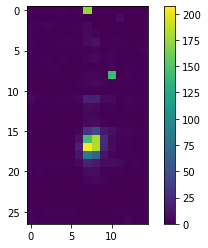

In [12]:
plt.imshow(df.iloc[200].Image)
plt.colorbar()

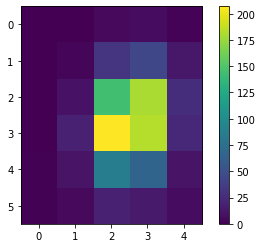

In [13]:
plt.imshow(df.iloc[200].BlobImages)
plt.colorbar()

# Finally, loading all data files

In [14]:
from tqdm import tqdm

In [15]:
dfs = []
for f in tqdm(files):
    dfs.append(load_csv_advanced(f))
df = pd.concat(dfs)
df.head()

100%|██████████| 3/3 [00:33<00:00, 11.07s/it]


userID  TaskID                                              Image  \
4796       1       8  [[0, 0, 0, 0, 0, 0, 0, 0, 156, 0, 0, 0, 0, 0, ...   
4802       1       8  [[0, 0, 0, 1, 5, 3, 2, 0, 1, 0, 0, 0, 0, 0, 0]...   
4806       1       8  [[0, 0, 0, 1, 5, 184, 1, 0, 0, 0, 0, 0, 0, 0, ...   
4807       1       8  [[0, 0, 0, 1, 5, 184, 1, 0, 0, 0, 0, 0, 0, 0, ...   
4808       1       8  [[0, 0, 0, 1, 5, 184, 1, 0, 0, 0, 0, 0, 0, 0, ...   

     InputMethod                                         BlobImages  BlobW  \
4796     Knuckle  [[0, 4, 9, 1, 0], [4, 7, 26, 21, 4], [2, 24, 1...      3   
4802     Knuckle  [[2, 3, 8, 6, 3], [1, 6, 22, 17, 5], [5, 24, 1...      3   
4806     Knuckle  [[0, 0, 9, 5, 2], [1, 4, 16, 21, 7], [1, 7, 72...      3   
4807     Knuckle  [[0, 2, 2, 7, 5, 2], [1, 2, 9, 24, 15, 5], [0,...      4   
4808     Knuckle  [[0, 0, 2, 7, 2, 2], [0, 1, 7, 13, 5, 4], [2, ...      4   

      BlobH  
4796      4  
4802      4  
4806      4  
4807      4  
4808      4

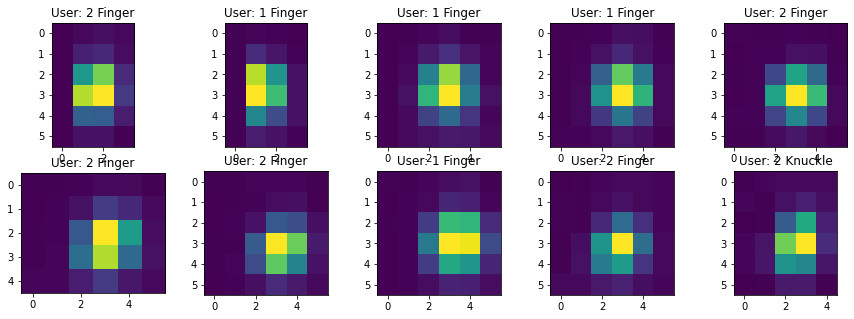

In [16]:
count = 10
rows = 2
fig, ax = plt.subplots(rows, int(count/rows), figsize=(15,5))
ax = ax.flatten()
for j, (i, e) in enumerate(df.sample(count).iterrows()):
    ax[j].imshow(e.BlobImages)
    ax[j].set_title("User: %i %s" % (e.userID, e.InputMethod))

# Prepare the input for Tensorflow

Well, for a NN model the inputs images need to have the same size. So we need to do this first

In [17]:
x = df.BlobImages.apply(lambda x: x.shape).to_list()
x = np.array(x)
print(x[:10])

print("Max W x H", x.max(axis=0))

[[6 5]
 [6 5]
 [6 5]
 [6 6]
 [6 6]
 [6 5]
 [6 5]
 [6 5]
 [6 6]
 [6 5]]
Max W x H [16 10]


Blob Size:  20 x 20


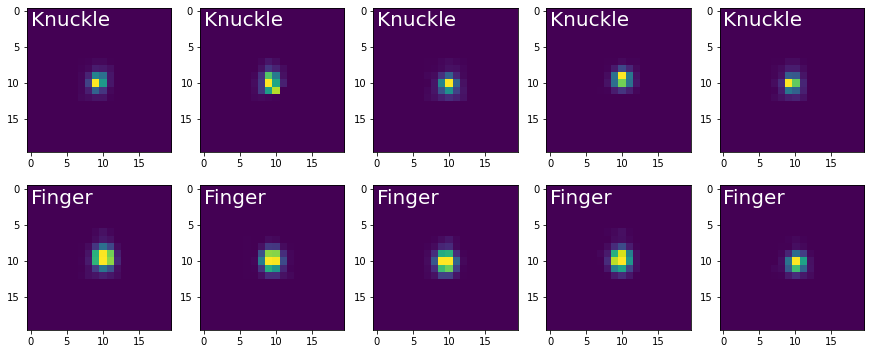

In [18]:
def pasteToEmpty (blob):
    croped_im = np.zeros((20,20))
    x1 = int(np.ceil(blob.shape[0]/2))
    y1 = int(np.ceil(blob.shape[1]/2))
    croped_im[10-x1:10+blob.shape[0]-x1,10-y1:10+blob.shape[1]-y1] = blob
    return croped_im

df["Blob"] = df.BlobImages.apply(lambda x: pasteToEmpty(x))

count = 10
rows = 2
fig, ax = plt.subplots(rows, int(count/rows), figsize=(15,6))
#ax = ax.flatten()
for k, ip in enumerate(df.InputMethod.unique()):
    for j, (i, e) in enumerate(df[df.InputMethod == ip].sample(int(count/rows)).iterrows()):
        ax[k,j].imshow(e.Blob)
        ax[k,j].text(0,2, "%s" % ( e.InputMethod), c="w", size=20)

W, H = df.iloc[0].Blob.shape
print("Blob Size: ", W, "x", H )

In [19]:
df["Blob1D"] = df.Blob.apply(lambda x: x.reshape(W* H))
size = df.iloc[0].Blob1D.shape[0]
size

400

In [20]:
df.head()

userID  TaskID                                              Image  \
4796       1       8  [[0, 0, 0, 0, 0, 0, 0, 0, 156, 0, 0, 0, 0, 0, ...   
4802       1       8  [[0, 0, 0, 1, 5, 3, 2, 0, 1, 0, 0, 0, 0, 0, 0]...   
4806       1       8  [[0, 0, 0, 1, 5, 184, 1, 0, 0, 0, 0, 0, 0, 0, ...   
4807       1       8  [[0, 0, 0, 1, 5, 184, 1, 0, 0, 0, 0, 0, 0, 0, ...   
4808       1       8  [[0, 0, 0, 1, 5, 184, 1, 0, 0, 0, 0, 0, 0, 0, ...   

     InputMethod                                         BlobImages  BlobW  \
4796     Knuckle  [[0, 4, 9, 1, 0], [4, 7, 26, 21, 4], [2, 24, 1...      3   
4802     Knuckle  [[2, 3, 8, 6, 3], [1, 6, 22, 17, 5], [5, 24, 1...      3   
4806     Knuckle  [[0, 0, 9, 5, 2], [1, 4, 16, 21, 7], [1, 7, 72...      3   
4807     Knuckle  [[0, 2, 2, 7, 5, 2], [1, 2, 9, 24, 15, 5], [0,...      4   
4808     Knuckle  [[0, 0, 2, 7, 2, 2], [0, 1, 7, 13, 5, 4], [2, ...      4   

      BlobH                                               Blob  \
4796      4  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
4802      4  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
4806      4  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
4807      4  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
4808      4  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   

                                                 Blob1D  
4796  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
4802  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
4806  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
4807  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
4808  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...

## One-Hot-Encoding
ML models can work with names such as "Finger" and "Knuckle." Therfore, we need to encode the classes using one-hot-encoding, see https://en.wikipedia.org/wiki/One-hot

[0,0,0,1] Class 1

[0,0,1,0]

[0,1,0,0]

[1,0,0,0]

In [21]:
## ALTERNATIVE APPROCH -- no thinking involved
#from sklearn.preprocessing import OneHotEncoder
#oneHotEncoder = OneHotEncoder(handle_unknown='ignore')
#X = [['Finger'], ['Knuckle']]
#oneHotEncoder.fit(X)
#toConvert = [[el] for el in df.InputMethod.to_list()]
#oneHotEncoder.transform(toConvert).toarray()


def getEncodedLabels(inputMethod):
    if inputMethod  == "Knuckle":
        return [0, 1]
    elif inputMethod == "Finger":
        return [1, 0]
    else:
        print("Error")
        return np.nan

df["Label"] = df.InputMethod.apply(lambda x: getEncodedLabels(x))

In [22]:
df.Blob1D.iloc[0].shape[0]

400

In [23]:
len(df.Label.iloc[0])

2

In [24]:
df[["Blob1D", "Label"]]

Blob1D   Label
4796   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  [0, 1]
4802   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  [0, 1]
4806   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  [0, 1]
4807   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  [0, 1]
4808   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  [0, 1]
...                                                  ...     ...
53410  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  [1, 0]
53411  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  [1, 0]
53412  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  [1, 0]
53413  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  [1, 0]
53414  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  [1, 0]

[21004 rows x 2 columns]

In [25]:
df[["Blob1D", "Label", "userID"]].to_pickle("./dataKnckleTouch/knuckletouch_only3ps.pkl")

# Building a classifier with Tensorflow


<mark>Complex model stuctures are part of a future session</mark>

Blob1D -> f(x) -> Label

x -> f(x) -> y

In [28]:
size

400

In [29]:
tf.keras.layers.Dense?

In [59]:
model = tf.keras.Sequential()

x = tf.keras.layers.InputLayer((size,), name="InputLayer")
model.add(x)

# activation='relu'is the default function, What is ReLu? https://en.wikipedia.org/wiki/Rectifier_(neural_networks)
x = tf.keras.layers.Dense(100, name="HiddenLayer1", activation='relu')
model.add(x) 

x = tf.keras.layers.Dense(40, name="HiddenLayer2", activation='relu')
model.add(x) 

# As this is classificaion problem the "correct" activation fuction is softmax
model.add(tf.keras.layers.Dense(2, name="OutputLayer", activation='softmax')) # 

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
HiddenLayer2 (Dense)         (None, 40)                16040     
_________________________________________________________________
OutputLayer (Dense)          (None, 2)                 82        
Total params: 16,122
Trainable params: 16,122
Non-trainable params: 0
_________________________________________________________________


In [60]:
lossFunction = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

In [61]:
model.compile(optimizer='adam', loss=lossFunction, metrics=['accuracy'])

In [62]:
x_train = np.stack(df.Blob1D.to_list())
y_train = np.stack(df.Label.to_list())
x_train.shape, y_train.shape

((21004, 400), (21004, 2))

In [63]:
history = model.fit(x_train, y_train,
                    batch_size=32, # default to 32.
                    epochs=25)

Epoch 1/25


/usr/local/lib/python3.9/site-packages/tensorflow/python/keras/backend.py:4869: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


657/657 [==============================] - 1s 711us/step - loss: 2.0531 - accuracy: 0.7885
Epoch 2/25
657/657 [==============================] - 0s 695us/step - loss: 0.2454 - accuracy: 0.9159
Epoch 3/25
657/657 [==============================] - 0s 686us/step - loss: 0.2186 - accuracy: 0.9224
Epoch 4/25
657/657 [==============================] - 0s 700us/step - loss: 0.1972 - accuracy: 0.9290
Epoch 5/25
657/657 [==============================] - 0s 701us/step - loss: 0.1853 - accuracy: 0.9361
Epoch 6/25
657/657 [==============================] - 0s 689us/step - loss: 0.1788 - accuracy: 0.9350
Epoch 7/25
657/657 [==============================] - 0s 693us/step - loss: 0.1647 - accuracy: 0.9373
Epoch 8/25
657/657 [==============================] - 0s 723us/step - loss: 0.1412 - accuracy: 0.9470
Epoch 9/25
657/657 [==============================] - 0s 702us/step - loss: 0.1473 - accuracy: 0.9468
Epoch 10/25
657/657 [==============================] - 0s 701us/step - loss: 0.1383 - accurac

(0.5, 1.0)

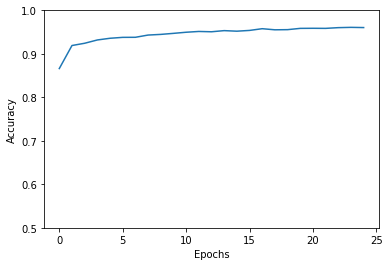

In [64]:
plt.plot(history.history["accuracy"])
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.ylim(0.5,1)

## But how good is it in reality?

Therefore we need training, validation, and test set. For the general information see 
https://en.wikipedia.org/wiki/Training,_validation,_and_test_sets for the HCI domain see https://dl.acm.org/doi/10.1145/3436958

<mark>Training, validation, and test set -- is part of a future session</mark>

For data recorded from particapnts never use a random split - it will lead to "overfitting"


<mark>Over and underfitting -- is part of a future session</mark>


In [92]:
# This is identical to the following:
model = tf.keras.Sequential()

model.add(tf.keras.layers.InputLayer((size,), name="InputLayer"))

# activation='relu'is the default function, What is ReLu? https://en.wikipedia.org/wiki/Rectifier_(neural_networks)
model.add(tf.keras.layers.Dense(100, name="HiddenLayer", activation='relu')) 
model.add(tf.keras.layers.Dropout(.8)) 

model.add(tf.keras.layers.Dense(40, name="HiddenLayer2", activation='relu')) 

# As this is classificaion problem the "correct" activation fuction is softmax
model.add(tf.keras.layers.Dense(2, name="OutputLayer", activation='softmax'))

model.summary()

lossFunction = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

optimizer = 'adam'
#learning_rate = 0.001
#optimizer = tf.keras.optimizers.Adamax(learning_rate=learning_rate)
#optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss=lossFunction, metrics=['accuracy'])

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
HiddenLayer (Dense)          (None, 100)               40100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
HiddenLayer2 (Dense)         (None, 40)                4040      
_________________________________________________________________
OutputLayer (Dense)          (None, 2)                 82        
Total params: 44,222
Trainable params: 44,222
Non-trainable params: 0
_________________________________________________________________


In [93]:
df.userID.unique()

array([1, 2, 3])

In [94]:
dfTrain = df[df.userID.isin([1,2])]
dfValidation = df[df.userID.isin([3])]

x_train = np.stack(dfTrain.Blob1D.to_list())
y_train = np.stack(dfTrain.Label.to_list())
print(x_train.shape, y_train.shape)

x_Val = np.stack(dfValidation.Blob1D.to_list())
y_Val = np.stack(dfValidation.Label.to_list())
print(x_Val.shape, y_Val.shape)

(14662, 400) (14662, 2)
(6342, 400) (6342, 2)


In [95]:
history = model.fit(x_train, y_train,
                    batch_size=32, # default is 32.
                    validation_data = (x_Val, y_Val),
                    epochs=25)

Epoch 1/25
459/459 [==============================] - 1s 2ms/step - loss: 4.2760 - accuracy: 0.6475 - val_loss: 0.5636 - val_accuracy: 0.7632
Epoch 2/25
459/459 [==============================] - 1s 1ms/step - loss: 0.5366 - accuracy: 0.7378 - val_loss: 0.5462 - val_accuracy: 0.7892
Epoch 3/25
459/459 [==============================] - 1s 1ms/step - loss: 0.4897 - accuracy: 0.7745 - val_loss: 0.6178 - val_accuracy: 0.7857
Epoch 4/25
459/459 [==============================] - 1s 1ms/step - loss: 0.4623 - accuracy: 0.7942 - val_loss: 0.4744 - val_accuracy: 0.8535
Epoch 5/25
459/459 [==============================] - 1s 1ms/step - loss: 0.4320 - accuracy: 0.8052 - val_loss: 0.5253 - val_accuracy: 0.8344
Epoch 6/25
459/459 [==============================] - 1s 1ms/step - loss: 0.4046 - accuracy: 0.8227 - val_loss: 0.5780 - val_accuracy: 0.8108
Epoch 7/25
459/459 [==============================] - 1s 1ms/step - loss: 0.3943 - accuracy: 0.8262 - val_loss: 0.5454 - val_accuracy: 0.8508
Epoch 

In [96]:
"Accuracy training: %.2f%% validation: %.2f%%" % (history.history["accuracy"][-1] * 100, history.history["val_accuracy"][-1] * 100, )

'Accuracy training: 85.77% validation: 75.02%'

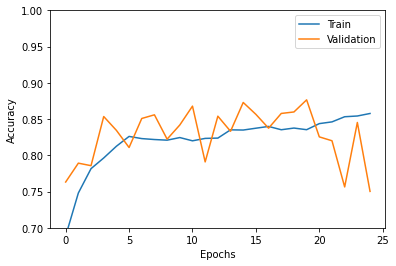

In [98]:
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Validation")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.ylim(.7,1)
plt.legend()

## Strategies to improve training
* Shuffling the data - mostly done with the standard parameter 
* More samples 
* More particiapnts
* Data agumentation
* More training time / eprochs
* Advanced model structures (e.g. CNN, attention layer)
* Dropout layers
* L1 & L2 regularization
* Different optimizer
* Custom loss function